In [1]:
from cartopy.feature import LAND, COASTLINE
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from pyresample import image
from pyresample.utils import load_cf_area

In [2]:
nextsim_ds = Dataset('20200601_hr-nersc-MODEL-nextsimf-ARC-b20200602-fv00.0.nc')
nextsim_area, _ = load_cf_area('20200601_hr-nersc-MODEL-nextsimf-ARC-b20200602-fv00.0.nc')
siconc_nextsim = nextsim_ds['siconc'][0]


nc_ds = Dataset('ice_conc_nh_polstere-100_amsr2-tud_202006011200.nc')
nc_area, _ = load_cf_area('ice_conc_nh_polstere-100_amsr2-tud_202006011200.nc')
data2 = nc_ds['ice_conc'][0]
data2 /= 100
nc_crs = nc_area.to_cartopy_crs()

nextsim_quick = image.ImageContainerQuick(siconc_nextsim, nextsim_area)
nc_resampled = nextsim_quick.resample(nc_area)
result_data_quick = nc_resampled.image_data

imgs = [data2, result_data_quick, data2 - result_data_quick]


/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()
<ipython-input-2-13416b445fee>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  siconc_nextsim = nextsim_ds['siconc'][0]
/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-fo

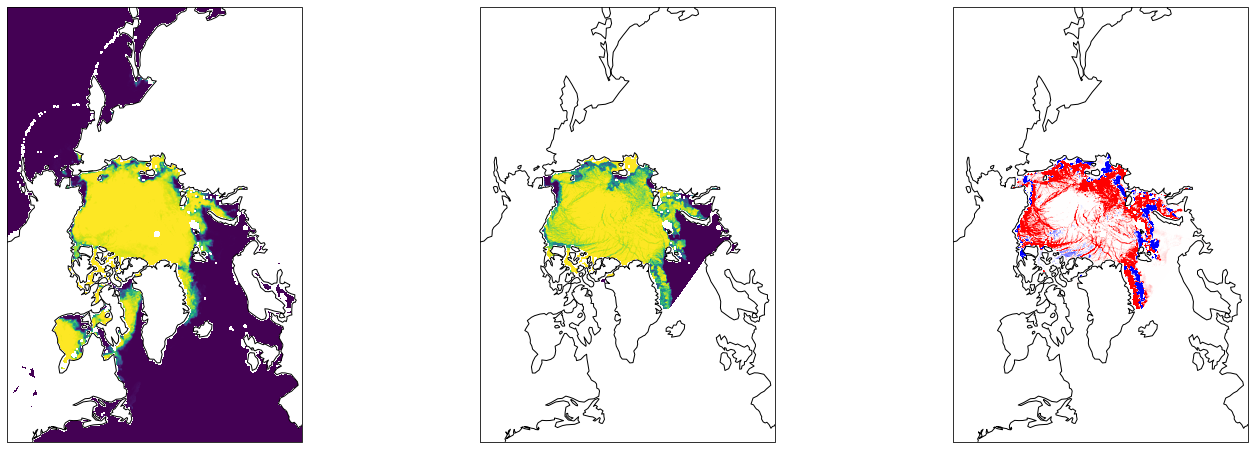

In [3]:
figsize = (24,8)
fig, ax = plt.subplots(1,3, figsize=figsize, subplot_kw={'projection': nc_crs})
clims = [
    [0, 1],
    [0, 1],
    [-0.1, 0.1],
]
cmaps = [
    'viridis',
    'viridis',
    'bwr',
]
for i in range(3):
    ax[i].imshow(imgs[i], clim=clims[i], cmap=cmaps[i], extent=nc_crs.bounds)
    ax[i].add_feature(COASTLINE)
plt.show()